# This Notebook will be used for the Final Capstone Project where we will analyze Traffic.


In [2]:
import pandas as pd
import numpy as np
   
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction/Business Problem

In [3]:
# Driving represents the most common transportation method of the modern socities, due to the large amount of users there are many accidents and problems that the societies and governments all around the world needs to fix and solve. With this project I will be able to analyze different conditions (weather, light, location, etc.) that lead to higher traffic, car accidents and type of accidents as well as to show the vulnerable locations and type of accidents that mostly occur; providing these findings the society and government can use this information to create awareness and develop measurements to diminish these accidents. This can be achieved by a machine learning algorythm that cannot only predict the conditions before the events happens but also used to demonstrate what places need special general awareness-

## Data Section

In [5]:
# The data consists on a table provided by Coursera and has 38 columns and about 200,000 incidents(accidents) that demonstrates all the attributes of the accident; there are several conditions that are dependant to each Accident, as well as independent conditions in the Data. For which all the data cleaning process will be done to fit the Data to Machine Learning Methods, such as  Machine Learning Methods: K-nearest neighbor, Decision Tree, and Support vector machine. The locations will be drawn into a map using python Data Visualization and Plateau.

In [6]:
# The Seattle Police Department has compilled the traffic collisions in Seattle Area from 2004 and it is regularly fed.

# After analyzing the data, the Severitycode measures the damage of the collision and characteristics that can easily used to predict similar sever collisions that will happen in the future using Machine Learning models. The data needs to be cleaned, adjust and fitted to produce the expected outcomes. 

## Methodology

In [7]:
## Cleaning Data

# Other & Unknown data
# Columns Weather, Road condition, and Light Condition showing unknown data will be replaced by Other.
# Rows with data showing "Unknow" or "Blank" status will be deleted.

#Small Categories
# Columns showing small counts will not be considered in most of the study, as the study wants to analyze the most influential/repetitive counts.


# NaN & Dummy values
# Most likely there will be many NaN values to be cleaned when converting Columns to Categories such as Weather Column to be transformed to 0s and 1s. The same with Road & Light conditions. All the columns without values will be eliminated.

# At the end all the relevant data should show no string values and ready to be normalized.

In [4]:
import csv 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [10]:
df_data_1.shape

(194673, 38)

In [9]:
# The size of the table consists on 38 columns and 194,673 inputs.

In [10]:
# Counting the empty columns on our main columns Severity, Weather, Road condition, and Light Condition 

In [11]:
Severitycond = pd.DataFrame(df_data_1['SEVERITYCODE'])
Weathercond = pd.DataFrame(df_data_1['WEATHER'])
Roadcond = pd.DataFrame(df_data_1['ROADCOND'])
Lightcond = pd.DataFrame(df_data_1['LIGHTCOND'])

In [12]:
Severitycond.isnull().sum()

SEVERITYCODE    0
dtype: int64

In [13]:
Weathercond.isnull().sum()

WEATHER    5081
dtype: int64

In [14]:
Roadcond.isnull().sum()

ROADCOND    5012
dtype: int64

In [1]:
Lightcond.isnull().sum()

NameError: name 'Lightcond' is not defined

In [16]:
# Summary of all the null values from all columns

In [14]:
df_data_1.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [15]:
# Getting the values for our main columns Severity, Weather, Road condition, and Light Condition 

In [16]:
df_data_1['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [17]:
df_data_1['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [18]:
df_data_1['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [19]:
df_data_1['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [20]:
# Creating a new DataFrame with the above conditions

In [21]:
Conditions = pd.DataFrame(df_data_1['WEATHER'],df_data_1['SEVERITYCODE'])
Conditions.head()

,WEATHER
SEVERITYCODE,
2,Overcast
1,Raining
1,Raining
1,Raining
2,Overcast


In [22]:
Conditions1 = pd.DataFrame(df_data_1['ROADCOND'],df_data_1['SEVERITYCODE'])
Conditions1.head()

,ROADCOND
SEVERITYCODE,
2,Dry
1,Wet
1,Wet
1,Wet
2,Dry


In [23]:
Conditions2 = pd.DataFrame(df_data_1['LIGHTCOND'],df_data_1['SEVERITYCODE'])
Conditions2.head()

,LIGHTCOND
SEVERITYCODE,
2,Daylight
1,Dark - Street Lights On
1,Dark - Street Lights On
1,Dark - Street Lights On
2,Daylight


In [ ]:
# Correlations

In [24]:
df_data_1.corr()['SEVERITYCODE']

SEVERITYCODE      1.000000
X                 0.010309
Y                 0.017737
OBJECTID          0.020131
INCKEY            0.022065
COLDETKEY         0.022079
INTKEY            0.006553
SEVERITYCODE.1    1.000000
PERSONCOUNT       0.130949
PEDCOUNT          0.246338
PEDCYLCOUNT       0.214218
VEHCOUNT         -0.054686
SDOT_COLCODE      0.188905
SDOTCOLNUM        0.004226
SEGLANEKEY        0.104276
CROSSWALKKEY      0.175093
Name: SEVERITYCODE, dtype: float64

In [25]:
df_data_1.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [ ]:
# Removing Columns with low correlation to Severitycode and that will not be used in further analysis

In [6]:
df_data_2 = df_data_1.drop(columns={'ADDRTYPE','ST_COLCODE','SEVERITYDESC','SDOT_COLCODE','INCDATE','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','SEVERITYCODE.1','OBJECTID','INCKEY','COLDETKEY'})
df_data_2.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2607959,Matched,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,...,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,1482393,Matched,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,...,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,3503937,Matched,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,...,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,0,0,N


In [7]:
# Removing more columns that won´t be needed
df_data_2 = df_data_2.drop(columns={'PEDCOUNT', 'SEGLANEKEY','CROSSWALKKEY'})
df_data_2                                     

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,Entering at angle,N
1,1,-122.347294,47.647172,2607959,Matched,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,From same direction - both going straight - bo...,N
2,1,-122.334540,47.607871,1482393,Matched,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,One parked--one moving,N
3,1,-122.334803,47.604803,3503937,Matched,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,From same direction - all others,N
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,N
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,Entering at angle,N
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,2,12/9/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,N
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,N,Clear,Dry,Daylight,Vehicle Strikes Pedalcyclist,N
8,1,-122.335930,47.611904,2071243,Matched,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,Parked Car,2,0,2,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,One parked--one moving,N
9,2,-122.384700,47.528475,2072105,Matched,34679.0,41ST AVE SW AND SW THISTLE ST,Angles,2,0,2,3/20/2006 3:49:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,Entering at angle,N


In [28]:
#Counting and dropping cells with NaN values
count_nan=len(df_data_2)-df_data_2.count()
count_nan

SEVERITYCODE          0
X                  5334
Y                  5334
REPORTNO              0
STATUS                0
INTKEY           129603
LOCATION           2677
COLLISIONTYPE      4904
PERSONCOUNT           0
PEDCYLCOUNT           0
VEHCOUNT              0
INCDTTM               0
JUNCTIONTYPE       6329
SDOT_COLDESC          0
UNDERINFL          4884
WEATHER            5081
ROADCOND           5012
LIGHTCOND          5170
ST_COLDESC         4904
HITPARKEDCAR          0
dtype: int64

In [8]:
df_data_3 = df_data_2.dropna()
count_nan=len(df_data_3)-df_data_3.count()
count_nan

SEVERITYCODE     0
X                0
Y                0
REPORTNO         0
STATUS           0
INTKEY           0
LOCATION         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDTTM          0
JUNCTIONTYPE     0
SDOT_COLDESC     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLDESC       0
HITPARKEDCAR     0
dtype: int64

In [9]:
# Replacing Columns from Data to 0s & 1s

df_data_3['UNDERINFL'].replace(to_replace=['N','Y','0','1'], value=[0,1,0,1],inplace=True)
df_data_3.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Wet,Daylight,Entering at angle,N
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,N
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,Entering at angle,N
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,2,12/9/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,N
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,Clear,Dry,Daylight,Vehicle Strikes Pedalcyclist,N


In [10]:
df_data_3['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_data_3.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Overcast,Wet,Daylight,Entering at angle,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,0
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,2,4/20/2019 5:42:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Clear,Dry,Daylight,Entering at angle,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,2,12/9/2008,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,Entering at angle,0
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,1,4/15/2020 5:47:00 PM,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0,Clear,Dry,Daylight,Vehicle Strikes Pedalcyclist,0


In [11]:
# Preparing / Cleaning JUNCTIONTYPE column
df_data_3['JUNCTIONTYPE'].value_counts()

At Intersection (intersection related)               60911
At Intersection (but not related to intersection)     2029
Ramp Junction                                           29
Mid-Block (not related to intersection)                 11
Mid-Block (but intersection related)                     1
Unknown                                                  1
Name: JUNCTIONTYPE, dtype: int64

In [12]:
# Joining cells for a better analysis & dropping "Junction Type column, the results will be displayed in columns instead"

def renaming(data):
    if data == 'Unknown' or data =='Ramp Junction' or data =='At Intersection (but not related to intersection)' or data =='Driveway Junction':
        return 'Other'
    else:
        return data

df_data_3['JUNCTIONTYPE'] = df_data_3.apply(lambda df_data_3 : renaming(df_data_3['JUNCTIONTYPE']),axis=1)
df_data_3['JUNCTIONTYPE'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


At Intersection (intersection related)     60911
Other                                       2059
Mid-Block (not related to intersection)       11
Mid-Block (but intersection related)           1
Name: JUNCTIONTYPE, dtype: int64

In [13]:
df_data_3 = pd.concat([df_data_3,pd.get_dummies(df_data_3['JUNCTIONTYPE'])], axis=1)
df_data_3.drop(['JUNCTIONTYPE'], axis = 1,inplace=True)
df_data_3.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLDESC,HITPARKEDCAR,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Other
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,Overcast,Wet,Daylight,Entering at angle,0,1,0,0,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,Raining,Wet,Daylight,Entering at angle,0,1,0,0,0
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,Clear,Dry,Daylight,Entering at angle,0,1,0,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,Raining,Wet,Daylight,Entering at angle,0,1,0,0,0
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,Clear,Dry,Daylight,Vehicle Strikes Pedalcyclist,0,1,0,0,0


In [14]:
# The same for Weather - Joining cells for a better analysis & dropping "WEATHER" Type column, the results will be displayed in columns instead"
df_data_3['WEATHER'].value_counts()

Clear                       38795
Raining                     12422
Overcast                     9722
Unknown                      1457
Snowing                       212
Fog/Smog/Smoke                182
Other                         133
Sleet/Hail/Freezing Rain       41
Blowing Sand/Dirt              10
Severe Crosswind                5
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [15]:
df_data_3 = pd.concat([df_data_3,pd.get_dummies(df_data_3['WEATHER'])], axis=1)
df_data_3.drop(['WEATHER'], axis = 1,inplace=True)
df_data_3.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,1,0,0,0,0,0,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,0,0,0,0,1,0,0,0,0
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,1,0,0,0,0,0,0,0,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,0,0,0,0,1,0,0,0,0
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,1,0,0,0,0,0,0,0,0,0


In [25]:
# The same for Road Conditions - Joining cells for a better analysis & dropping "ROADCOND" Type column, the results will be displayed in columns instead"
df_data_3['ROADCOND'].value_counts()

Dry               43446
Wet               17679
Unknown            1402
Snow/Slush          197
Ice                 190
Other                24
Standing Water       20
Sand/Mud/Dirt        13
Oil                  11
Name: ROADCOND, dtype: int64

In [26]:
def renaming(data):
    if data == 'Oil' or data =='Sand/Mud/Dirt' or data =='Standing Water' or data =='Ice' or data =='Snow/Slush':
        return 'Other'
    else:
        return data

df_data_3['ROADCOND'] = df_data_3.apply(lambda df_data_3 : renaming(df_data_3['ROADCOND']),axis=1)

In [17]:
df_data_3 = pd.concat([df_data_3,pd.get_dummies(df_data_3['ROADCOND'])], axis=1)
df_data_3.drop(['ROADCOND'], axis = 1,inplace=True)
df_data_3.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,0,0,0,0,0,0,1
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,0,0,0,0,0,0,0,0,1
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,1,0,0,0,0,0,0,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,0,0,0,0,0,0,0,0,1
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,1,0,0,0,0,0,0,0,0


In [16]:
# The same for Light Conditions - Joining cells for a better analysis & dropping "LIGHTCOND" Type column, the results will be displayed in columns instead.
df_data_3['LIGHTCOND'].value_counts()

Daylight                    42081
Dark - Street Lights On     16024
Dusk                         2106
Unknown                      1170
Dawn                          892
Dark - Street Lights Off      354
Dark - No Street Lights       314
Other                          37
Dark - Unknown Lighting         4
Name: LIGHTCOND, dtype: int64

In [18]:
def renaming(data):
    if data == 'Dark - Unknown Lighting' or data =='Dark - Street Lights Off' or data =='Dark - No Street Lights' or data =='Dawn' or data =='Dusk':
        return 'Other'
    else:
        return data

df_data_3['LIGHTCOND'] = df_data_3.apply(lambda df_data_3 : renaming(df_data_3['LIGHTCOND']),axis=1)

In [19]:
df_data_3 = pd.concat([df_data_3,pd.get_dummies(df_data_3['LIGHTCOND'])], axis=1)
df_data_3.drop(['LIGHTCOND'], axis = 1,inplace=True)
df_data_3.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,0,0,0,0,0,0,1,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,0,0,0,0,0,0,1,0,0


In [43]:
## Normalizing
# Defining X and Y

In [44]:
df_data_3.rename(columns={'X':'Latitude','Y':'Longitude'}, inplace=True)
df_data_3.head()

,SEVERITYCODE,Latitude,Longitude,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Snowing,Unknown,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,0,1,0,0,0,0,1,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,0,1,0,0,0,0,1,0,0


In [28]:
d2=df_data_3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d32ae9dd8>]],
      dtype=object)

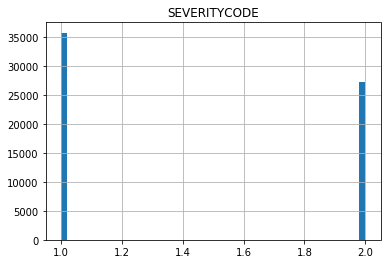

In [21]:
df_data_3.hist(column='SEVERITYCODE', bins=50)

In [20]:
y = df_data_3['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 2])

In [22]:
d1=df_data_3

In [23]:
d1=df_data_3.drop(columns={'SEVERITYCODE'})
d1.head()

,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,...,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,2,...,0,0,0,0,0,1,0,1,0,0
4,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,2,...,0,0,0,0,0,1,0,1,0,0
5,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,2,...,0,0,0,0,0,0,0,1,0,0
6,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,2,...,0,0,0,0,0,1,0,1,0,0
7,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:
d1 = d1.drop(columns={'REPORTNO','STATUS','LOCATION','COLLISIONTYPE','INCDTTM','SDOT_COLDESC','ST_COLDESC'})
d1.head(5)

,X,Y,INTKEY,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,At Intersection (intersection related),Mid-Block (but intersection related),...,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,-122.323148,47.703140,37475.0,2,0,2,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,-122.306426,47.545739,34387.0,2,0,2,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5,-122.387598,47.690575,36974.0,2,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,-122.338485,47.618534,29510.0,2,0,2,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7,-122.320780,47.614076,29745.0,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
d1.select_dtypes(['object']).columns

Index([], dtype='object')

In [26]:
# Dropped columns with object to be able to fit the data for X
X =d1.values
X = preprocessing.StandardScaler().fit(X).transform(X)
X [0:5]

array([[ 2.51432435e-01,  1.45141952e+00,  3.57864205e-03,
        -4.07278136e-01, -2.27117828e-01,  2.01489401e-01,
        -1.90518300e-01, -4.98301959e-02,  1.84392047e-01,
        -3.98469628e-03, -1.32167918e-02, -1.83838951e-01,
        -1.26016164e-02, -1.26647574e+00, -5.38339036e-02,
        -4.60019916e-02,  2.34057614e+00, -6.90180599e-03,
        -4.95669538e-01, -8.91033470e-03, -2.55226115e-02,
        -5.81154849e-02, -1.53887720e-01, -1.49127273e+00,
        -5.50078464e-02, -1.32167918e-02, -1.95245107e-02,
        -1.43683956e-02, -5.60151062e-02, -1.78227921e-02,
        -1.50887813e-01,  1.60079100e+00, -5.84158462e-01,
         7.04758799e-01, -2.50078014e-01, -1.37580389e-01],
       [ 8.41015884e-01, -1.37204013e+00, -5.73935307e-02,
        -4.07278136e-01, -2.27117828e-01,  2.01489401e-01,
        -1.90518300e-01, -4.98301959e-02,  1.84392047e-01,
        -3.98469628e-03, -1.32167918e-02, -1.83838951e-01,
        -1.26016164e-02, -1.26647574e+00, -5.38339036e-

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (50385, 36) (50385,)
Test set: (12597, 36) (12597,)


In [55]:
## K - Neighbor


In [56]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn import metrics

In [59]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [62]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7049915649498859
Test set Accuracy:  0.6390410415178217


In [63]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5887116 , 0.62046519, 0.60562039, 0.63078511, 0.62086211,
       0.63554815, 0.62427562, 0.63570691, 0.62483131])

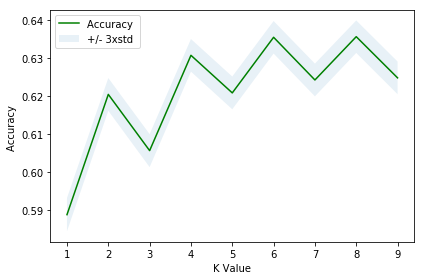

In [64]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K Value')
plt.tight_layout()
plt.show()

In [65]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6357069143446853 with k= 8


In [66]:
## Decision Tree

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
accitree = DecisionTreeClassifier(criterion="gini", max_depth = 30)
accitree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
accitree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
predTree = accitree.predict(X_testset)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6109552791743847


In [52]:
predTree.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [70]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: | ^C
failed

CondaError: KeyboardInterrupt

Solving environment: \ ^C


In [30]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

ModuleNotFoundError: No module named 'pydotplus'

In [29]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = d2.columns[0:31]
targetNames = d2["d1"].unique().tolist()
out=tree.export_graphviz(accitree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

NameError: name 'StringIO' is not defined

In [76]:
## Support Vector Machine

In [79]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [80]:
print("Support Vector Accuracy: ", metrics.accuracy_score(y_test,yhat))

Support Vector Accuracy:  0.6248313090418354


In [81]:
d2=df_data_3
d2.head()

,SEVERITYCODE,Latitude,Longitude,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Snowing,Unknown,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,0,1,0,0,0,0,1,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,0,1,0,0,0,0,1,0,0


In [82]:
d2.describe()

,SEVERITYCODE,Latitude,Longitude,INTKEY,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,At Intersection (intersection related),...,Snowing,Unknown,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
count,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,...,62982.000000,62982.000000,62982.000000,62982.000000,62982.00000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000
mean,1.432568,-122.330280,47.622227,37293.755899,2.586803,0.049617,1.900051,0.035026,0.002477,0.967118,...,0.003366,0.023134,0.689816,0.007224,0.02226,0.280699,0.254422,0.668143,0.058858,0.018577
std,0.495436,0.028363,0.055748,50646.456836,1.440802,0.218467,0.496056,0.183847,0.049707,0.178330,...,0.057920,0.150329,0.462572,0.084689,0.14753,0.449344,0.435539,0.470884,0.235361,0.135026
min,1.000000,-122.419091,47.495573,23808.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.347384,47.583659,28663.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-122.330244,47.616490,29973.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,-122.312497,47.665036,33983.750000,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2.000000,-122.241082,47.734141,757580.000000,81.000000,2.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
d2.describe()

,SEVERITYCODE,Latitude,Longitude,INTKEY,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,At Intersection (intersection related),...,Snowing,Unknown,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
count,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000,...,62982.000000,62982.000000,62982.000000,62982.000000,62982.00000,62982.000000,62982.000000,62982.000000,62982.000000,62982.000000
mean,1.432568,-122.330280,47.622227,37293.755899,2.586803,0.049617,1.900051,0.035026,0.002477,0.967118,...,0.003366,0.023134,0.689816,0.007224,0.02226,0.280699,0.254422,0.668143,0.058858,0.018577
std,0.495436,0.028363,0.055748,50646.456836,1.440802,0.218467,0.496056,0.183847,0.049707,0.178330,...,0.057920,0.150329,0.462572,0.084689,0.14753,0.449344,0.435539,0.470884,0.235361,0.135026
min,1.000000,-122.419091,47.495573,23808.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.347384,47.583659,28663.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-122.330244,47.616490,29973.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,-122.312497,47.665036,33983.750000,3.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2.000000,-122.241082,47.734141,757580.000000,81.000000,2.000000,10.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Accident Severity under Alcohol or Drug Influence')

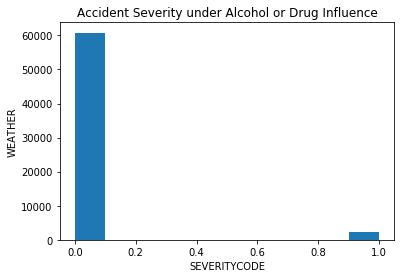

In [92]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(d2["UNDERINFL"])

# set x/y labels and plot title
plt.pyplot.xlabel("SEVERITYCODE")
plt.pyplot.ylabel("WEATHER")
plt.pyplot.title("Accident Severity under Alcohol or Drug Influence")

In [97]:
## Key Means

In [94]:
X1= X
X1

array([[ 2.51432435e-01,  1.45141952e+00,  3.57864205e-03, ...,
         7.04758799e-01, -2.50078014e-01, -1.37580389e-01],
       [ 8.41015884e-01, -1.37204013e+00, -5.73935307e-02, ...,
         7.04758799e-01, -2.50078014e-01, -1.37580389e-01],
       [-2.02091831e+00,  1.22603064e+00, -6.31354012e-03, ...,
         7.04758799e-01, -2.50078014e-01, -1.37580389e-01],
       ...,
       [ 9.18903757e-01,  8.48651490e-01, -2.22895070e-01, ...,
         7.04758799e-01, -2.50078014e-01, -1.37580389e-01],
       [ 8.31767779e-01,  1.09098444e+00, -2.47477438e-01, ...,
         7.04758799e-01, -2.50078014e-01, -1.37580389e-01],
       [-8.82749113e-01,  1.01362351e+00, -2.55592582e-01, ...,
        -1.41892517e+00,  3.99875217e+00, -1.37580389e-01]])

In [95]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [96]:
k_means.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 2, ..., 2, 2, 0], dtype=int32)

In [101]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.61911376e-04,  1.54685066e-01,  6.37842271e-03,
        -3.15023478e-01,  4.37717761e+00, -1.85195576e+00,
        -6.97226309e-02, -4.98301959e-02,  1.27619936e-01,
        -3.98469628e-03,  1.14972982e-02, -1.28743759e-01,
        -1.26016164e-02,  2.12792310e-01, -2.34134455e-02,
        -1.75445243e-02, -1.59589107e-02, -6.90180599e-03,
        -1.80500758e-01, -8.91033470e-03, -1.27184096e-02,
        -5.81154849e-02, -1.32162925e-01,  2.41306476e-01,
        -5.05977160e-02, -1.24323496e-01, -1.98055627e-01,
        -1.55247619e-01,  1.38812973e-01,  5.38063131e-02,
        -7.71128990e-02],
       [ 8.84000919e-03, -3.31292867e-03, -2.33084652e-04,
         1.65045149e-02, -2.27117828e-01,  6.52864740e-02,
         2.59519564e-02, -6.24257025e-03,  2.26122735e-02,
        -3.98469628e-03, -1.32167918e-02, -2.16044105e-02,
         1.00243887e-02, -1.11947136e+00,  2.46137511e-03,
        -1.12247891e-02,  1.92157176e-01,  1.35958377e-03,
         1.21362287e+00,  1.02

In [102]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 7-10, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[10,10], [-8, -7], [9, -9], [7, 7]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

TypeError: 'module' object is not callable

In [103]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 0 ... 0 0 0]


In [104]:
d2["SEVERITYCODE"] = labels
d2.head(5)

,SEVERITYCODE,Latitude,Longitude,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Snowing,Unknown,Dry,Other,Unknown,Wet,Dark - Street Lights On,Daylight,Other,Unknown
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
5,0,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,0,1,0,0,0,0,1,0,0
6,2,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,0,0,0,0,1,0,1,0,0
7,0,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,0,1,0,0,0,0,1,0,0


In [105]:
d2.mean ()

SEVERITYCODE                                   0.779667
Latitude                                    -122.330280
Longitude                                     47.622227
INTKEY                                     37293.755899
PERSONCOUNT                                    2.586803
PEDCYLCOUNT                                    0.049617
VEHCOUNT                                       1.900051
UNDERINFL                                      0.035026
HITPARKEDCAR                                   0.002477
At Intersection (intersection related)         0.967118
Mid-Block (but intersection related)           0.000016
Mid-Block (not related to intersection)        0.000175
Other                                          0.032692
Blowing Sand/Dirt                              0.000159
Clear                                          0.615970
Fog/Smog/Smoke                                 0.002890
Other                                          0.002112
Overcast                                       0

In [106]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 1 ... 1 1 1]


In [115]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('LOCATION', fontsize=18)
plt.ylabel('SEVERITYCODE', fontsize=16)

plt.show()

AttributeError: module 'matplotlib' has no attribute 'scatter'

In [108]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('WEATHER')
    plt.xlabel('LOCATION')

In [110]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.65      0.76      0.70      7177
           2       0.58      0.45      0.51      5420

   micro avg       0.62      0.62      0.62     12597
   macro avg       0.61      0.60      0.60     12597
weighted avg       0.62      0.62      0.62     12597



In [114]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['y_test','yhat'],normalize= False,  title='Confusion matrix')

TypeError: 'module' object is not callable

In [116]:
%%capture
! pip install seaborn

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [134]:
d2[["PERSONCOUNT", "VEHCOUNT"]].corr()

,PERSONCOUNT,VEHCOUNT
PERSONCOUNT,1.000000,0.308704
VEHCOUNT,0.308704,1.000000


(0, 85.05431847560706)

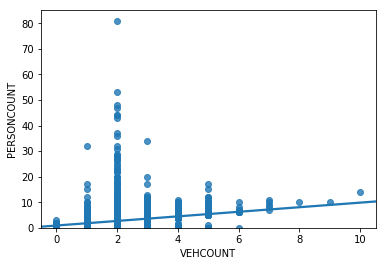

In [133]:
sns.regplot(x="VEHCOUNT", y="PERSONCOUNT", data=d2)
plt.ylim(0,)

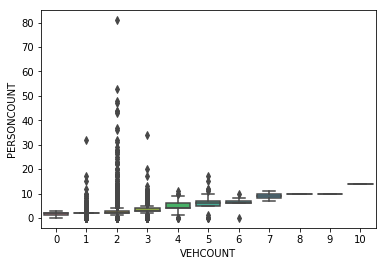

In [140]:
sns.boxplot(x="VEHCOUNT", y="PERSONCOUNT", data=d2)

In [31]:
historic = d2.loc['X', years]
historic.head()

NameError: name 'years' is not defined

In [158]:
years = list(map(str, range(2003, 2018)))
years

['2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [ ]:
historic.plot()

In [148]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [152]:
d2.to_csv("INCDATE", date_format='%Y%m%d')

KeyError: 'SEVERITYCODE'

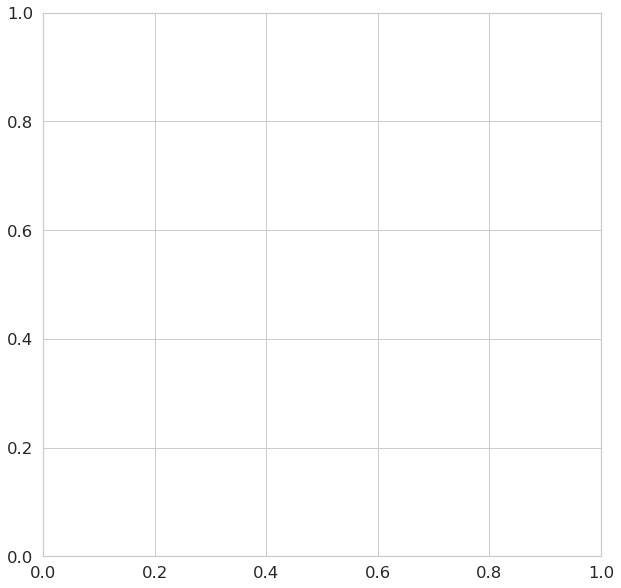

In [173]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(d1["SEVERITYCODE"],
        d1["JUNCTIONTYPE"],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="JUNCTIONTYPE",
       title="Yearly Accidents by Juntion Type")

plt.show()

In [66]:
d4=df_data_3
d4.head()

,SEVERITYCODE,X,Y,REPORTNO,STATUS,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCYLCOUNT,...,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Other,Unknown,Wet
0,2,-122.323148,47.703140,3502005,Matched,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,...,0,0,0,0,0,0,0,0,0,1
4,2,-122.306426,47.545739,1807429,Matched,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,...,0,1,0,0,0,0,0,0,0,1
5,1,-122.387598,47.690575,E919477,Matched,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,0,...,0,0,0,0,0,0,1,0,0,0
6,1,-122.338485,47.618534,3282542,Matched,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,0,...,0,1,0,0,0,0,0,0,0,1
7,2,-122.320780,47.614076,EA30304,Matched,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,...,0,0,0,0,0,0,1,0,0,0


In [79]:
ax = d4("COLLISIONTYPE","PERSONCOUNT","LOCATION").plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Type of Accidents')
ax.set_ylabel('Accident Type')
ax.set_xlabel('Number of Accidents')

TypeError: 'DataFrame' object is not callable

In [80]:
d4 = d4.drop(columns={'REPORTNO','STATUS','PEDCYLCOUNT','Partly Cloudy','Raining','Severe Crosswind','INCDTTM','SDOT_COLDESC','ST_COLDESC'})
d4.head(5)

,SEVERITYCODE,X,Y,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,...,Fog/Smog/Smoke,Other,Overcast,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Other,Unknown,Wet
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,2,0,Daylight,...,0,0,1,0,0,0,0,0,0,1
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,0,Daylight,...,0,0,0,0,0,0,0,0,0,1
5,1,-122.387598,47.690575,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,2,0,Daylight,...,0,0,0,0,0,0,1,0,0,0
6,1,-122.338485,47.618534,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,2,0,Daylight,...,0,0,0,0,0,0,0,0,0,1
7,2,-122.320780,47.614076,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,0,Daylight,...,0,0,0,0,0,0,1,0,0,0


In [81]:
d4 = d4.drop(columns={'Fog/Smog/Smoke','Other','Overcast','Sleet/Hail/Freezing Rain','Snowing','Unknown','Dry','Other','Unknown','Wet'})
d4.head(5)

,SEVERITYCODE,X,Y,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,HITPARKEDCAR,At Intersection (intersection related),Mid-Block (but intersection related),Mid-Block (not related to intersection),Blowing Sand/Dirt,Clear
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,2,0,Daylight,0,1,0,0,0,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,0,Daylight,0,1,0,0,0,0
5,1,-122.387598,47.690575,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,2,0,Daylight,0,1,0,0,0,1
6,1,-122.338485,47.618534,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,2,0,Daylight,0,1,0,0,0,0
7,2,-122.320780,47.614076,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,0,Daylight,0,1,0,0,0,1


In [83]:
d4 = d4.drop(columns={'At Intersection (intersection related)','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Blowing Sand/Dirt','Clear'})
d4.head(5)

,SEVERITYCODE,X,Y,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,2,0,Daylight,0
4,2,-122.306426,47.545739,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,0,Daylight,0
5,1,-122.387598,47.690575,36974.0,24TH AVE NW AND NW 85TH ST,Angles,2,2,0,Daylight,0
6,1,-122.338485,47.618534,29510.0,DENNY WAY AND WESTLAKE AVE,Angles,2,2,0,Daylight,0
7,2,-122.320780,47.614076,29745.0,BROADWAY AND E PIKE ST,Cycles,3,1,0,Daylight,0


In [85]:
d4 = d4.drop(columns={'X','Y','INTKEY'})
d4.head(5)

,SEVERITYCODE,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,HITPARKEDCAR
0,2,5TH AVE NE AND NE 103RD ST,Angles,2,2,0,Daylight,0
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,0,Daylight,0
5,1,24TH AVE NW AND NW 85TH ST,Angles,2,2,0,Daylight,0
6,1,DENNY WAY AND WESTLAKE AVE,Angles,2,2,0,Daylight,0
7,2,BROADWAY AND E PIKE ST,Cycles,3,1,0,Daylight,0


Text(0.5, 0, 'Accumulative Accidents')

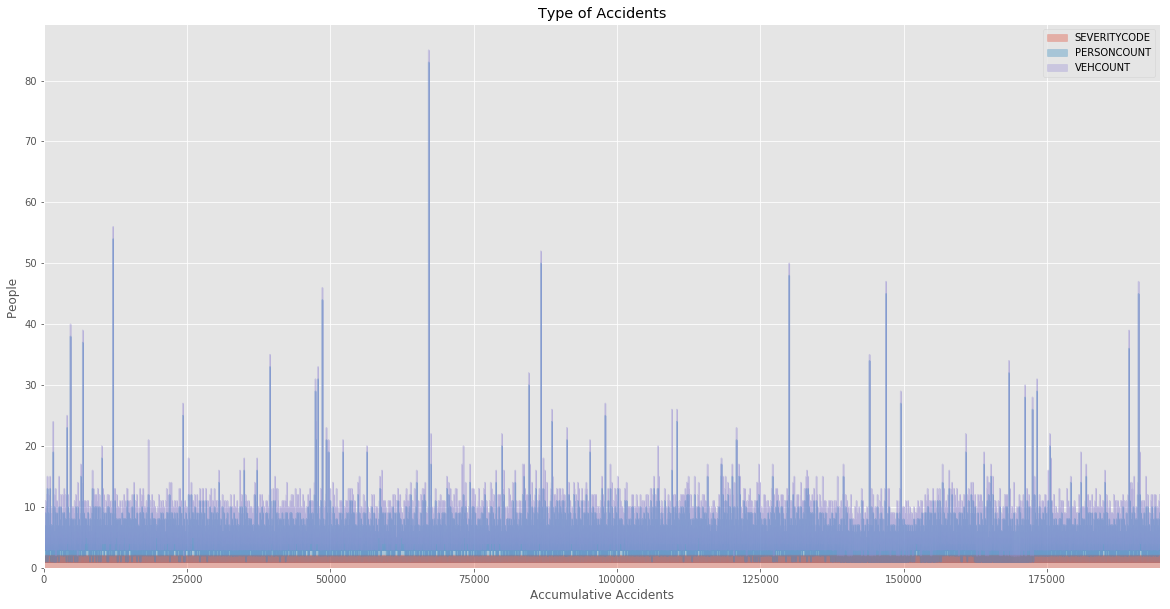

In [89]:
ax = d4.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Type of Accidents')
ax.set_ylabel('People ')
ax.set_xlabel('Accumulative Accidents')

In [33]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [110]:
# group countries by continents and apply sum() function 
d4_total = d2.groupby('LOCATION', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(d4_total.groupby('LOCATION', axis=0)))

d4_total.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,SEVERITYCODE,X,Y,INTKEY,PERSONCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,At Intersection (intersection related),...,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Other,Unknown,Wet
LOCATION,,,,,,,,,,,,,,,,,,,,,
10TH AVE AND E ALDER ST,1,-122.319411,47.604360,29828.0,2,0,2,0,0,1,...,0,0,0,0,0,1,0,0,1,0
10TH AVE AND E JEFFERSON ST,11,-1223.194158,476.062086,298110.0,20,1,18,1,0,9,...,0,4,0,0,0,0,5,0,0,5
10TH AVE AND E MADISON ST,11,-1223.193478,476.117579,297650.0,22,0,20,1,0,9,...,0,3,0,0,0,1,5,0,1,4
10TH AVE AND E PIKE ST,31,-2691.027830,1047.509874,654412.0,57,0,37,1,0,20,...,0,4,0,0,0,1,15,0,1,6
10TH AVE AND E PINE ST,31,-2446.389310,952.304903,594760.0,47,4,27,1,0,19,...,0,5,0,0,0,1,14,0,1,5


In [111]:
# group countries by continents and apply sum() function 
d4_total.plot()

TypeError: 'DataFrame' object is not callable

In [135]:
npm install --save seattle-boundaries-data

SyntaxError: invalid syntax (<ipython-input-135-b49bc914996b>, line 1)

In [138]:
import pandas as pd
import geopandas as gpd

# 2 - convert to Geopandas Geodataframe
gdf_listings = gpd.GeoDataFrame(listings,   geometry=gpd.points_from_xy(listings.longitude, listings.latitude))
# 3 - Neighbourhoods
geojson_file = “d2/seattle_neighbourhoods.geojson”
traffic = gpd.read_file(geojson_file)

SyntaxError: invalid character in identifier (<ipython-input-138-02667d8be321>, line 7)

In [140]:
seattle_areas = gpd.read_file(“d2/seattle_areas.geojson”)
seattle_areas.head()

SyntaxError: invalid character in identifier (<ipython-input-140-d01ac658bae8>, line 1)

In [141]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json

In [142]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

NameError: name 'folium' is not defined

In [ ]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map